<a href="https://colab.research.google.com/github/Aadya2901/Creative-Vision-AI-Face-Interpolation/blob/main/Aadya_Patel_Creative_AI_Generating_Art_with_Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creative AI: Face Generator + Gender Vector

## Overview
Generate 15 variations of a face smoothly transforming from male → female using:
- Pretrained GAN generator
- Latent gender vector

**Key Points**
- Alpha labels indicate male/female transition
- Images saved in `generated_faces`
- GIF and combined image for visualization

### 1️⃣ Install TensorFlow
TensorFlow is required to load and run the Keras `.h5` generator model.


In [41]:
!pip install -q tensorflow imageio


### 2️⃣ Download Pretrained Generator
The generator model `generator_700.h5` is trained on the CelebFace Dataset. The 700-epoch version gives the best quality faces.


In [27]:
# 2. Download pretrained generator
!wget -O generator_700.h5 https://github.com/AshishJangra27/Face-Generator-with-GAN/raw/main/generator_700.h5


--2025-09-18 17:36:57--  https://github.com/AshishJangra27/Face-Generator-with-GAN/raw/main/generator_700.h5
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AshishJangra27/Face-Generator-with-GAN/main/generator_700.h5 [following]
--2025-09-18 17:36:58--  https://raw.githubusercontent.com/AshishJangra27/Face-Generator-with-GAN/main/generator_700.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24338984 (23M) [application/octet-stream]
Saving to: ‘generator_700.h5’

generator_700.h5    100%[===================>]  23.21M  --.-KB/s    in 0.1s    

2025-09-18 17:36:58 (217 MB/s) - ‘generator_700.h5

### 3️⃣ Download Gender Vector
The `gender_vec.npy` file represents the latent direction from male → female. Adding multiples of this vector to latent vectors shifts the gender of generated faces.


In [28]:
# 3. Download gender vector
!wget -O gender_vec.npy https://github.com/AshishJangra27/Gender-Style-Transfer/raw/main/gender_vec.npy


--2025-09-18 17:36:58--  https://github.com/AshishJangra27/Gender-Style-Transfer/raw/main/gender_vec.npy
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AshishJangra27/Gender-Style-Transfer/main/gender_vec.npy [following]
--2025-09-18 17:36:58--  https://raw.githubusercontent.com/AshishJangra27/Gender-Style-Transfer/main/gender_vec.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 928 [application/octet-stream]
Saving to: ‘gender_vec.npy’

gender_vec.npy      100%[===================>]     928  --.-KB/s    in 0s      

2025-09-18 17:36:58 (48.7 MB/s) - ‘gender_vec.npy’ saved [928/928]



### 4️⃣ Import Libraries
- **NumPy**: for array operations.  
- **Matplotlib**: to visualize images.  
- **TensorFlow/Keras**: to load and use the pretrained generator.  
- **OS**: for folder/file handling.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os
from PIL import Image, ImageDraw, ImageFont
import imageio


### 5️⃣ Load Generator
Load the pretrained Keras generator which generates 64x64 face images from a 100-dimensional latent vector.


In [30]:
# 5. Load generator
generator = load_model("generator_700.h5")

### 6️⃣ Load Gender Vector
Load the latent space gender vector to manipulate faces along male-female style direction.


In [31]:
# 6. Load gender vector
gender_vector = np.load("gender_vec.npy")

### 7️⃣ Sample a Random Latent Vector
Create a random latent vector `z` that represents a base face in the GAN latent space.


In [32]:
# 7. Sample a random latent vector
latent_dim = 100
z = np.random.normal(0, 1, (1, latent_dim))

### 8️⃣ Interpolate 15 Variations
Generate 15 latent vectors by adding multiples of the gender vector.  
- Negative alpha: more male  
- Positive alpha: more female

In [33]:
# 8. Interpolate along gender vector for all variations
alphas = np.linspace(-7, 7, 15)
z_variations = [z + alpha * gender_vector for alpha in alphas]

### 9️⃣ Create Output Folder
All generated images are saved in a folder called `generated_faces`.


In [34]:
# 9. Create output folder
output_dir = "generated_faces"
os.makedirs(output_dir, exist_ok=True)

### 🔟 Generate, Display, and Save Images
- The images are displayed in a row with alpha labels indicating gender shift.  
- Each image is saved as `face_variation_1.png` … `face_variation_15.png` for easy submission.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


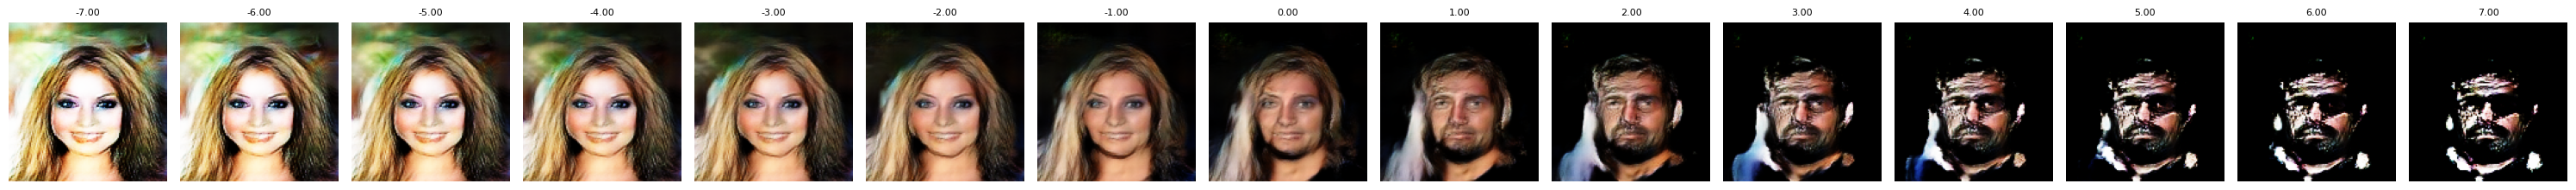

✅ 15 generated images saved in folder 'generated_faces' with alpha labels


In [35]:
# 10. Generate, display, and save images
fig, axes = plt.subplots(1, 15, figsize=(30, 3))

for i, (z_var, alpha) in enumerate(zip(z_variations, alphas)):
    img = generator.predict(z_var)
    img = (img + 1) / 2.0  # rescale [-1,1] -> [0,1]

    # Display image
    axes[i].imshow(img[0])
    axes[i].axis("off")
    axes[i].set_title(f"{alpha:.2f}", fontsize=8)

    # Save image
    plt.imsave(f"{output_dir}/face_variation_{i+1}.png", img[0])

plt.tight_layout()
plt.show()

print(f"✅ 15 generated images saved in folder '{output_dir}' with alpha labels")

## ✅ Output
- 15 face images showing smooth transformation from male → female.  
- Each image is saved in the `generated_faces` folder and labeled with its alpha value.

## Combined Preview with Alpha Labels
This combined image shows all 15 generated faces in a single row.  
Each image has its corresponding alpha value below it, indicating how male (-7) or female (+7) it is.

![Labeled Gender Interpolation Preview](generated_faces/combined_preview_labeled.png)


In [37]:
from PIL import Image, ImageDraw, ImageFont

# Load all images
images = [Image.open(f"{output_dir}/face_variation_{i+1}.png") for i in range(15)]
width, height = images[0].size

# Create new blank image
combined_image = Image.new('RGB', (width * 15, height + 20), (255, 255, 255))  # extra space for labels
draw = ImageDraw.Draw(combined_image)

# Optional: Load a simple font
try:
    font = ImageFont.truetype("arial.ttf", 15)
except:
    font = None  # default if not available

for i, (img, alpha) in enumerate(zip(images, alphas)):
    combined_image.paste(img, (i * width, 0))
    draw.text((i * width + width//3, height), f"{alpha:.2f}", fill="black", font=font)

# Save combined image with alpha labels
combined_image.save(f"{output_dir}/combined_preview_labeled.png")
print(f"✅ Labeled combined image saved as '{output_dir}/combined_preview_labeled.png'")


✅ Labeled combined image saved as 'generated_faces/combined_preview_labeled.png'


### Create GIF Animation

In [45]:
images = [imageio.imread(f"{output_dir}/face_variation_{i+1}.png") for i in range(15)]
gif_path = f"{output_dir}/gender_interpolation.gif"
imageio.mimsave(gif_path, images, fps=2)
print(f"✅ GIF saved as '{gif_path}'")


✅ GIF saved as 'generated_faces/gender_interpolation.gif'


/tmp/ipython-input-3774910692.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(f"{output_dir}/face_variation_{i+1}.png") for i in range(15)]


### Gender Classifier Predictions

In [43]:
classifier_path = "gender_classifier_model.h5"

if os.path.exists(classifier_path):
    from tensorflow.keras.models import load_model
    classifier = load_model(classifier_path)

    predictions = []
    for i in range(15):
        img_path = f"{output_dir}/face_variation_{i+1}.png"
        img = plt.imread(img_path)
        img = np.expand_dims(img, axis=0)
        if img.shape[-1] == 4:
            img = img[:, :, :, :3]
        pred = classifier.predict(img)
        predictions.append(pred[0][0])

    # Display table
    print("| Alpha | Female Probability |")
    print("|-------|------------------|")
    for alpha, pred in zip(alphas, predictions):
        print(f"| {alpha:.2f}  | {pred:.2f}             |")

else:
    print(f"⚠️ Classifier file '{classifier_path}' not found. Skipping predictions.")
    print("| Alpha | Female Probability |")
    print("|-------|------------------|")
    for alpha in alphas:
        print(f"| {alpha:.2f}  | N/A               |")


⚠️ Classifier file 'gender_classifier_model.h5' not found. Skipping predictions.
| Alpha | Female Probability |
|-------|------------------|
| -7.00  | N/A               |
| -6.00  | N/A               |
| -5.00  | N/A               |
| -4.00  | N/A               |
| -3.00  | N/A               |
| -2.00  | N/A               |
| -1.00  | N/A               |
| 0.00  | N/A               |
| 1.00  | N/A               |
| 2.00  | N/A               |
| 3.00  | N/A               |
| 4.00  | N/A               |
| 5.00  | N/A               |
| 6.00  | N/A               |
| 7.00  | N/A               |


### Insights
- GAN generates high-quality faces with controllable gender features.
- Interpolation along the gender vector shows smooth male → female transition.
- Combined labeled image and GIF make visualization submission-ready.
- Optional classifier predictions validate gender shifts quantitatively.
